In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

1. Đọc dữ liệu từ file đã tải xuống và hiển thị dữ liệu từ dòng thứ 15 đến dòng thứ 30

In [11]:
df = pd.read_csv('students.csv')
df.loc[14:29]

,gender,group,parental level of education,lunch,english certification,math score,basic informatics score,programming techniques score,code,name
14,female,group A,master's degree,standard,none,50,53,58,15,sleazy silver okapi
15,female,group C,some high school,standard,none,69,75,78,16,cozy magnolia turtle
16,male,group C,high school,standard,none,88,89,86,17,seedy red chipmunk
17,female,group B,some high school,free/reduced,none,18,32,28,18,wimpy amaranth uakari
18,male,group C,master's degree,free/reduced,completed,46,42,46,19,scanty emerald fousek
19,female,group C,associate's degree,free/reduced,none,54,58,61,20,wheezy lilac bee
20,male,group D,high school,standard,none,66,69,63,21,wheezy purple macaw
21,female,group B,some college,free/reduced,completed,65,75,70,22,gamy gamboge barracuda
22,male,group D,some college,standard,none,44,54,53,23,geeky chocolate dolphin
23,female,group C,some high school,standard,none,69,73,73,24,freaky buff lionfish


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   gender                        1000 non-null   object
 1   group                         1000 non-null   object
 2   parental level of education   1000 non-null   object
 3   lunch                         1000 non-null   object
 4   english certification         1000 non-null   object
 5   math score                    1000 non-null   int64 
 6   basic informatics score       1000 non-null   int64 
 7   programming techniques score  1000 non-null   int64 
 8   code                          1000 non-null   int64 
 9   name                          1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


2. Thay thế thông tin “gender”, “english certification”, “math score”, “basic informatics
score”, “programming techniques score”, “code” và “name” của sinh viên đầu tiên trong
tập dữ liệu bằng chính thông tin của Anh/Chị.

In [13]:
df[:1]

,gender,group,parental level of education,lunch,english certification,math score,basic informatics score,programming techniques score,code,name
0,female,group B,bachelor's degree,standard,none,72,72,74,1,gimpy zucchini caterpillar


In [14]:
my_col = ['gender', 'english certification', 'math score', 'basic informatics score', 'programming techniques score', 'code', 'name']
my_info = ['female', 'completed', 76, 95, 80, 194060873, 'Nguyễn Đỗ Thanh Thùy']
for i in range(len(my_col)): 
    df.loc[0, my_col[i]] = my_info[i] 
    print('update {} to {}'.format(my_col[i], my_info[i]))
df.head(2)

update gender to female
update english certification to completed
update math score to 76
update basic informatics score to 95
update programming techniques score to 80
update code to 194060873
update name to Nguyễn Đỗ Thanh Thùy


,gender,group,parental level of education,lunch,english certification,math score,basic informatics score,programming techniques score,code,name
0,female,group B,bachelor's degree,standard,completed,76,95,80,194060873,Nguyễn Đỗ Thanh Thùy
1,female,group C,some college,standard,completed,69,90,88,2,homely pear owl


3. Thuộc tính “lunch” bị sai sót do quá trình tổng hợp dữ liệu. Vui lòng xóa thuộc tính
này và lưu lại tập dữ liệu dưới định dạng excel, đặt tên “mssv”. Trong đó, “mssv” chính là
mã số sinh viên của Anh/Chị

In [30]:
#xóa 'lunch
df.drop('lunch',axis=1, inplace=True)
df.columns

Index(['gender', 'group', 'parental level of education',
       'english certification', 'math score', 'basic informatics score',
       'programming techniques score', 'code', 'name',
       'basic informatics scoreprogramming techniques score'],
      dtype='object')

In [34]:
#lưu file excel
df.to_excel('K194060873.xlsx', index=False)

4. Dựa trên quy tắc tính điểm của UEL. Xác định số lượng sinh viên đạt kết quả “Giỏi”,
“Khá”, “Trung Bình”, “Rớt” của môn toán cao cấp.

In [42]:
# df = df.assign(math_grade = lambda dataframe: dataframe['math score'].map(lambda x: 'Giỏi' if x >= 80 
#     else 'Khá' if x >= 66 
#     else 'Trung bình if x >= 50'
#     else 'Rớt'))
rank = []
for row in df['math score']:
    if row >= 80: 
        rank.append('Giỏi')
    elif row >= 65: 
        rank.append('Khá')
    elif row >=50:
        rank.append("Trung bình")
    else: rank.append("Rớt")
df['math_rank'] = rank
df.head()

,gender,group,parental level of education,english certification,math score,basic informatics score,programming techniques score,code,name,basic informatics scoreprogramming techniques score,math_rank
0,female,group B,bachelor's degree,completed,76,72,74,80,194060873,95.0,Khá
1,female,group C,some college,completed,69,90,88,2,homely pear owl,NaN,Khá
2,female,group B,master's degree,none,90,95,93,3,woolly scarlet retriever,NaN,Giỏi
3,male,group A,associate's degree,none,47,57,44,4,stealthy silver mastiff,NaN,Rớt
4,male,group C,some college,none,76,78,75,5,surly aqua zorse,NaN,Khá


In [119]:
#số lượng sinh viên theo xếp hạng môn toán cao cấp
df_math_rank = df.groupby('math_rank')['code'].count()
df_math_rank

math_rank
Giỏi          193
Khá           360
Rớt           135
Trung bình    312
Name: code, dtype: int64

5. Giả sử sinh viên được chia thành 3 nhóm dựa trên điểm kết khóa của môn kỹ thuật
lập trình: - Nhóm cải thiện: Điểm kết khóa thuộc khoảng [0; 60)
- Nhóm an phận: Điểm kết khóa thuộc khoảng [60; 80)
- Nhóm xuất sắc: Điểm kết khóa thuộc nhóm [80; 100]

In [45]:
programming_group = []
for row in df['programming techniques score']:
    if row >= 80:
        programming_group.append('Xuất sắc')
    elif row >= 60:
        programming_group.append('An phận')
    else: programming_group.append('Cải thiện')
df['programming_group'] = programming_group

In [81]:
df_pie = df.groupby('programming_group')['code'].count()
df_pie

programming_group
An phận      484
Cải thiện    281
Xuất sắc     235
Name: code, dtype: int64

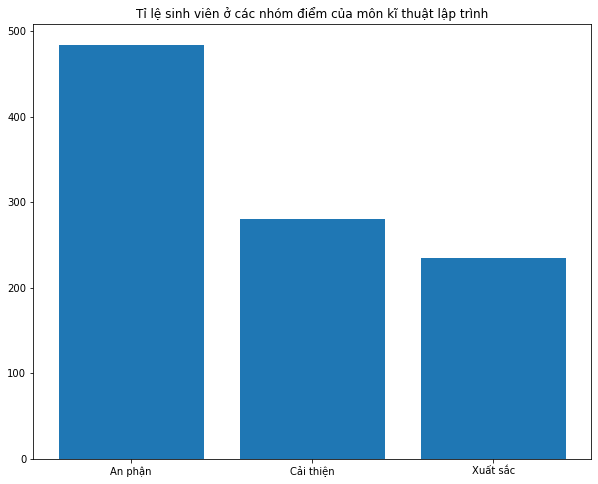

In [115]:
fig,ax = plt.subplots()
ax.bar(df_pie.index, df_pie)
plt.title('Tỉ lệ sinh viên ở các nhóm điểm của môn kĩ thuật lập trình')
plt.show()

6. Anh/Chị hãy đọc dữ liệu và xác định kiểu dữ liệu mà API trả về.
URL: https://mocki.io/v1/da1bd764-8d57-49e0-b4fe-88d435da6575

In [76]:
url = "https://mocki.io/v1/da1bd764-8d57-49e0-b4fe-88d435da6575"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

if response.status_code == 200:
    js_geo= response.json()
    print('Kiểu dữ liệu',type(js_geo))
    df_geo = pd.json_normalize(js_geo, record_path='data')
    print(df_geo)
else:
    print('Truy xuất bị lỗi - {response.status_code}, vui lòng thử lại sau')

Kiểu dữ liệu <class 'dict'>
     group    geo.area               geo.domain
0  group A    Mien Bac               Tay Bac Bo
1  group B    Mien Bac              Dong Bac Bo
2  group C  Mien Trung             Bac Trung Bo
3  group D    Mien Nam              Dong Nam Bo
4  group E    Mien Nam  Dong bang song Cuu Long


In [77]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   group       5 non-null      object
 1   geo.area    5 non-null      object
 2   geo.domain  5 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


7. Vẽ biểu đồ tròn thể hiện số lượng sinh viên theo miền với đầy đủ định dạng như tiêu
đề, legend, số lượng thể hiện dưới dạng tuyệt đối và tỉ lệ phần trăm. (2đ)

In [78]:
df = df.merge(df_geo, how='left', left_on='group', right_on='group')
df.head()

,gender,group,parental level of education,english certification,math score,basic informatics score,programming techniques score,code,name,basic informatics scoreprogramming techniques score,math_rank,programming_group,geo.area,geo.domain
0,female,group B,bachelor's degree,completed,76,72,74,80,194060873,95.0,Khá,An phận,Mien Bac,Dong Bac Bo
1,female,group C,some college,completed,69,90,88,2,homely pear owl,NaN,Khá,Xuất sắc,Mien Trung,Bac Trung Bo
2,female,group B,master's degree,none,90,95,93,3,woolly scarlet retriever,NaN,Giỏi,Xuất sắc,Mien Bac,Dong Bac Bo
3,male,group A,associate's degree,none,47,57,44,4,stealthy silver mastiff,NaN,Rớt,Cải thiện,Mien Bac,Tay Bac Bo
4,male,group C,some college,none,76,78,75,5,surly aqua zorse,NaN,Khá,An phận,Mien Trung,Bac Trung Bo


In [86]:
df_students_area = df.value_counts('geo.area')
df_students_area

geo.area
Mien Nam      402
Mien Trung    319
Mien Bac      279
dtype: int64

In [107]:
df_students_area.sum()

1000

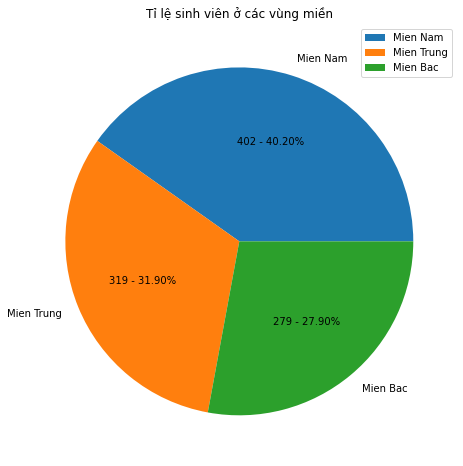

In [114]:
fig,ax = plt.subplots()
p, tx, autotexts = ax.pie(df_students_area, labels= df_students_area.index, autopct='%1.2f%%')
for i, a in enumerate(autotexts):
    a.set_text("{0} - {1:.2f}%".format(df_students_area[i], (df_students_area[i]/df_students_area.sum()*100)))
ax.legend()
plt.title('Tỉ lệ sinh viên ở các vùng miền')
plt.show()

8. Xác định một “Insight” mà Anh/Chị cảm thấy hữu ích, cần khuyến nghị cho người
quản trị dữ liệu/chủ doanh nghiệp/các bên liên quan ... Minh họa dựa trên hình ảnh, bảng
biểu và các giải thích, khuyến nghị kèm theo.

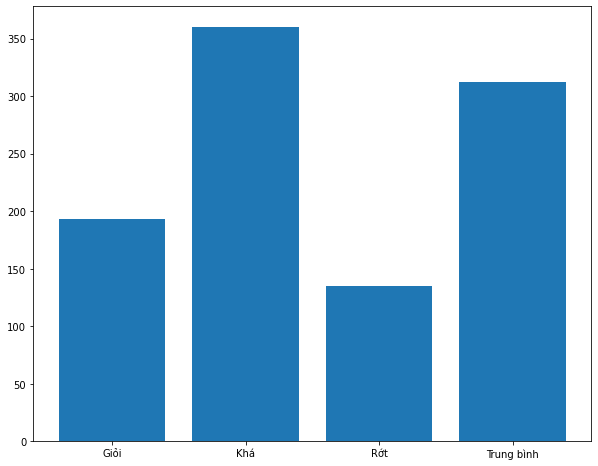

In [122]:
fig,ax = plt.subplots()
ax.bar(df_math_rank.index, df_math_rank)
plt.show('Xếp hạng của sinh viên học môn toán cao cấp')
plt.show()

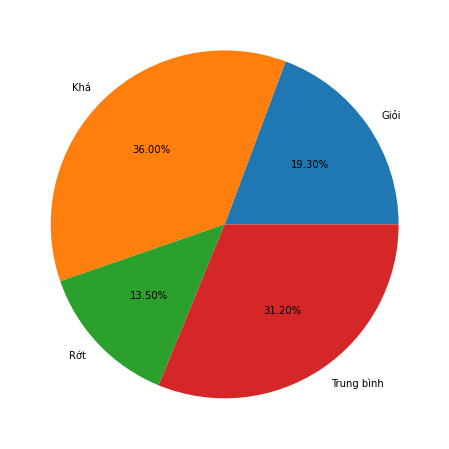

In [125]:
fig,ax = plt.subplots()
ax.pie(df_math_rank, labels=df_math_rank.index, autopct='%1.2f%%')
plt.show('Xếp hạng của sinh viên học môn toán cao cấp')
plt.show()

Tuy số lượng sinh viên rớt và trung bình không vượt